<h1 style = "font-size: 30px; text-align: center;">AI Computer Assignment 3</h1>
<h2 style = "font-size: 25px; text-align: center;">Naive Bayes</h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Name: Sepehr Ahmadi</h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Student Id: 810897031</h2>
<h4 style="text-align: center">Spring 1400</h4>

In [51]:
%%html
<style>.text_cell .rendered_html * {direction: rtl; text-align: right;}</style>

## سوال ۱
**stemmization:**
حروف اضافه را مثل: 
ها,
ان,
ی و ...
از کلمات خذف میکند تا به ریشه ی کلمه برسیم. البته جالب به ذکر است که کتابخانه هضم نمی تواند بعضی کلمات را درست تشخیص دهد مثلا «روان» تبدیل یه «رو» میشود یا «پرندگان» تبدیل به «پرندگ» میشود.

**lemmatization:**
افعال را تبدیل به «بن ماضی#بن مضارع» میکند.

هر دوی این کارها به دسته بندی درست کلمات برای تشخیص با الگوریتم
Bag of Words
کمک میکند.





## سوال ۲

**posterior:**
در این مسئله همان «کلاس به شرط کلمه» یا 
$P(category_i|word_j)$
میباشد.
در مجموع میبایست برای هر کلاس این جمله را حساب کنیم:
<br>
$P(category_i | Words) = P(category_i | w_1,w_2,w_3,..,w_d)$
<br>
حاصل این عبارت با توجه به جمله ی مقابل بدست میآید:
<br>
$P(category_k)*\Pi_{i=1}^{d} P(w_i | category_k)$

**prior:**
شامل
category prior probability (class)
و
word prior probability (predictor)
میباشد.
<br>
اولی با توجه به تعداد پیشامدهای یک کتگوری نسبت به کل کتگوری ها در
train data
محاسبه می شود.
که در اینجا هر کتگوری به یک اندازه تکرار شده و مقدار آن
$\frac{1}{6}$
است.
البته مقادیر دیگری نیز بر اساس حدس خوذمان نیز میتوانیم اختیار کنیم.
<br>
دومی احتمال پیشامد خود کلمه در بین کل کلمه ها میباشد که با 
$\frac{\text{instances of word_i}}{\text{instances of all words}}$
محاسبه میشود که در
train data
قابل محاسبه است.
مانند بالا میتوانیم مقادیر دیگر را نیز اختیار کنیم.
توجه شود که در
bag of words
 کاربردی ندارد چرا که کلماتی که در احتمال هر کتگوری باید بررسی کنیم یکسان است و در نظر گرفتن آن در محاسبه جواب فرقی بوجود نمیاورد.

**likelihood:**
احتمال پیشامد یک کلمه در یک کتگوری میباشد:
$P(word_i|category_k)$
<br>
این مقدار برای هر کلمه در هر کتگوری به این شکل محاسبه میشود:
$\frac{\text{instances of word_i in category_k}}{\text{instances of all words in category_k}}$
که در واقع با این کار به ازای هر کتگوری یک جدولی از همه کلمات و احتمال رخداد آنها بدست میاوریم.

**evidence:**
عبارت است از همه ی اطلاعاتی شامل احتمالات که از
train data
استخراج کردیم.
هر ۳ مقوله های بالا که تشریح کردیم، اعضای 
evidence
میباشند.



## سوال ۳

جمله ۱:
شیر آب را بستم.
<br>
جمله ۲:
شیر درنده است.

همانطور که مشاهده میشود مفهوم «شیر» در این دو جمله متفاوت است.
<br>
با استفاده از
bigram
میتوان با دوتا دوتا جدا کردن کلمات از جمله اول ترکیب «شیر آب» و از جمله دوم ترکیب «شیر درنده» را بدست آوریم 
و متوجه منظور متفاوت از کلمه ی «شیر» بشویم.

در این مثال استفاده از
bigram
کافی است.
<br>
البته ترکیب هایی را میتوان مثال زد که
bigram
برای تشخیص منظور کلمات کافی نباشد.

## سوال ۴

میدانیم برای محاسبه احتمال پیشامد کتگوری به ازای مجموعه کلمات داریم:

$P(category_k | w_1,w_2,w_3,..,w_d) = P(category_k)*\Pi_{i=1}^{d} P(w_i | category_k)$

حال در صورتی که به ازای یکی از
$P(w_i|category_k)$
داشته باشیم صفر؛ یعنی کلمه 
$w_i$
در
$category_k$
هیچ بار دیده نشده است.
آنگاه جواب مستقل از دیگر احتمالات، صفر میشود؛ یعنی امکان ندارد که کتگوری
k
انتخاب شود.
(کمترین احتمال)

## سوال ۵

additive smoothing
به ما اجازه میدهد که در صورتی که برای یک رخداد در محاسبه احتمال هیچ درصدی در نظر گرفته نشده باشد،
با اضافه کردن یک مقدار ثابت
$\alpha$
به همه ی احتمالات؛
در اینجا یعنی بازای هر 
$P(word|category)$
یک مقدار غیر صفر داریم،
از احتمال صفر در محاسبه جلوگیری کنیم و در صورتی که اگر یک کلمه در تست در یک کتگوری نباشد، دلیل بر آن
نباشد که احتمال پیشامد آن کتگوری صفر باشد.

البته هر چقدر این مقدار 
$\alpha$
بزرگتر باشد،دقت محاسبه پایین میاید.


## سوال ۷

برای همان مثال 
hamو spam،
حالت های زیر را در نظر بگیرید:

|                | actual spam | actual ham |
|----------------|-------------|------------|
| predicted spam | ۸           | 0          |
| predicted ham  | ۱۰           | ۲          |

 در حالت بالا مشاهده میشود که ۱۰ جواب اشتباه از ۲۰تا داریم، اما برای کلاس اسپم
 precision
 این مدل ۱۰۰٪ است(بنظر میرسد عالی است!) ولی
 recall
 برابر ۸/۱۸ است.
 (خوب نیست)
 
 |                | actual spam | actual ham |
|----------------|-------------|------------|
| predicted spam | ۸           | ۱۰          |
| predicted ham  | 0           | ۲          |

در این حالت نیز ۱۰ اشتباه از ۲۰تا داریم. اما برای کلاس اسپم
 recall
 این مدل ۱۰۰٪ است(بنظر میرسد عالی است!) ولی
 precision
 برابر ۸/۱۸ است.
 (خوب نیست)

در هر دو مدل accuracy
برابر ۵۰٪ است.

بنابراین مثالهای بالا نشان میدهد که هر کدام از 
precision
و
recall
به تنهایی معیار خوبی نیستند و باید در کنار هم درست کار کنند.

## سوال ۸

F1
از میانگین گیری همساز میان
precisison
و
recall
استفاده میکند.

این میانگین‌گیری معمولاً هنگامی کاربرد دارد که محاسبهٔ میانگین نرخ‌ها اهمیت داشته باشد.
که در اینجا نرخ های
precision
و
recall
را داریم.

شکل این میانگین گیری به این صورت است:

$H = \frac{n}{x_i \sum_{i=1}^{n} }$

و در اینجا داریم:
$F1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}$

## سوال ۹

**Macro:**
در این مدل میانگین‌گیری، یک میانگین معمولی میان 
F1
محاسبه شده برای هر کلاس میگیریم.

**Micro:**
در این مدل از میانگین گیری،
ابتدا مقادیر محاسبه شده برای هر کلاس را با هم جمع میکنیم تا یک کلاس بدست آوریم،
سپس 
precision
و
recall
را برای این کلاس محاسبه میکنیم تا با استفاده از آن 
f1
که جواب است، بدست آوریم.

**Weighted:**
همانند میانگین 
Macro
است با این تفاوت که بر هر یک از 
F1
های مربوط به هر کلاس با توجه به اهمیت آن،
ضریبی تسبت میدهیم و سپس میانگین گیری معمولی انجام میدهیم.

In [48]:
from __future__ import unicode_literals
from hazm import *
import numpy as np
import pandas as pd
import time

در کد پایین، فاز ۱ و قسمتی از فاز ۲ انجام شده است؛
به این گونه که ابتدا فایل 
csv
را در یک دیتافریم میریزیم و خط به خط آن را چک میکنیم.

با استفاده از کتابخانه هضم، کلمات ستون های
title
و 
description
را با
normalize(), stem(), lemmatize()
جدا میکنیم و تعداد تکرار آنها را در هر ۶ کتگوری در
words_dict\[word\]\[category\]
ذخیره میکنیم.



In [56]:
df1 = pd.read_csv('books_dataset/books_train.csv')
# df1.head(10)
cat = {}
words_dict = {}
stop_words1 = ['.',',','«','»','(',')','،','[',']','{','}','-','','؛',':']
stop_words2 = {stopword : 0 for stopword in stopwords_list()}

for this_cat in df1['categories']:
    cat[this_cat] = 0

normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()
for index, row in df1.iterrows():
    this_cat = row['categories']
    sent = row['title']*3 + row['description']
    title_str = normalizer.normalize(sent)
    title = word_tokenize(title_str)
#     print(title)
    for word in title:
        stemmed_word = stemmer.stem(word)
        clean_word = lemmatizer.lemmatize(stemmed_word)
        if clean_word not in words_dict:
            if word in stop_words1 or word in stop_words2 or clean_word in stop_words1 or clean_word in stop_words2:
                continue
            words_dict[clean_word] = cat.copy()
        words_dict[clean_word][this_cat] += 1

In [57]:
def additive_smoothe(words_dict):
    for word in words_dict:
#         print(words_dict[word])
        for this_cat in words_dict[word]:
            words_dict[word][this_cat] += 0.1
#     return words_dict
additive_smoothe(words_dict)

In [58]:
from math import log 
all_words_dict = {word : 0 for word in words_dict}
word_per_cat_prob = {this_cat : all_words_dict.copy() for this_cat in cat}
per_cat_sum = {this_cat : 0 for this_cat in cat}
all_words_sum = 0

#init P(word|category) -> word_per_cat_prob[category][word]
for word in words_dict:
    for this_cat in words_dict[word]:
        word_per_cat_prob[this_cat][word] = words_dict[word][this_cat]
        per_cat_sum[this_cat] += words_dict[word][this_cat]
        all_words_sum += words_dict[word][this_cat]
        

## سوال ۶

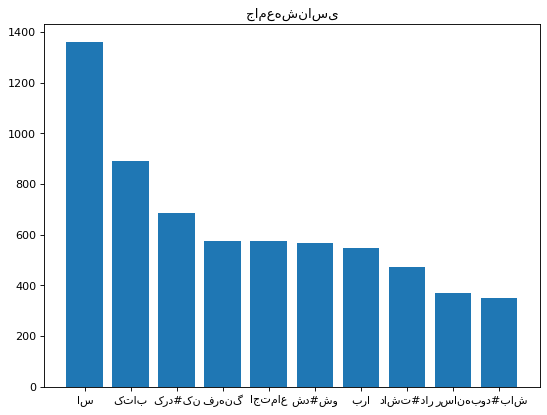

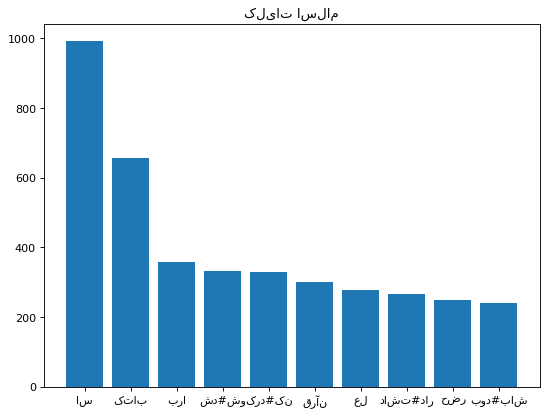

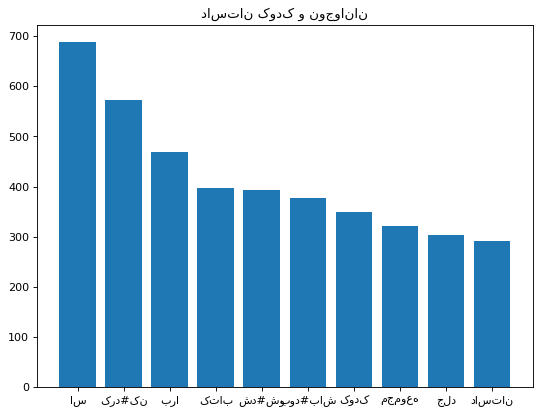

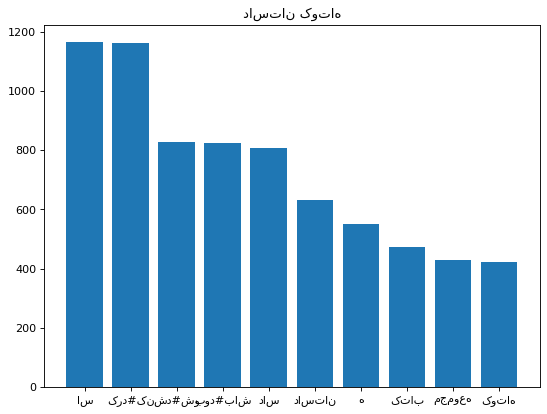

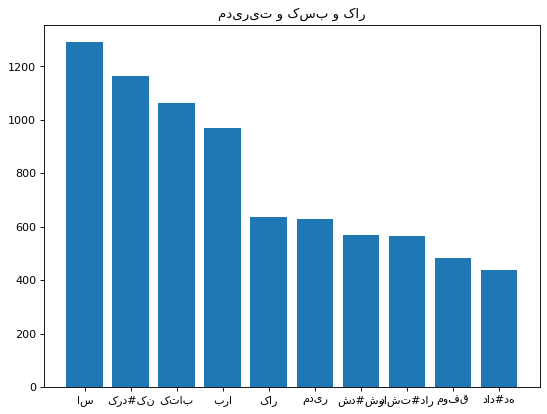

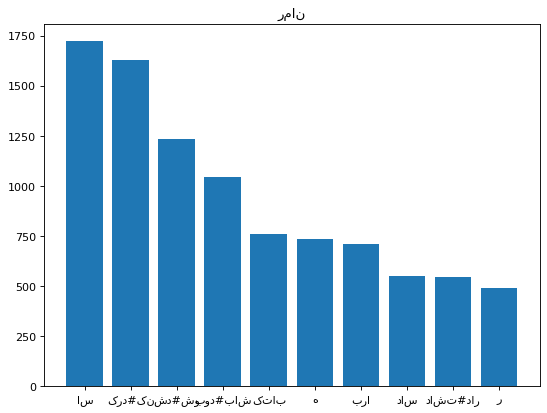

In [59]:
#bar plot
import matplotlib.pyplot as plt
from operator import itemgetter
from matplotlib.pyplot import figure

for this_cat in word_per_cat_prob:
    # cat = list(word_per_cat_prob.keys())[0]
    my_dict = word_per_cat_prob[this_cat].copy()
    res = dict(sorted(my_dict.items(), key = itemgetter(1), reverse = True)[:10])
    figure(figsize=(8, 6), dpi=80)
    plt.title(this_cat)
    plt.bar(range(len(res)), list(res.values()), align='center')
    plt.xticks(range(len(res)), list(res.keys()))
    plt.show()

In [60]:
#calculate P(word|category) -> word_per_cat_prob[category][word]        
for this_cat in word_per_cat_prob:
    for word in word_per_cat_prob[this_cat]:
        word_per_cat_prob[this_cat][word] = (word_per_cat_prob[this_cat][word]/per_cat_sum[this_cat])
#calculate P(category)
cat_prob = {this_cat : 0 for this_cat in cat}
for this_cat in df1['categories']:
    cat_prob[this_cat] += 1
for this_cat in cat_prob:
    cat_prob[this_cat] = cat_prob[this_cat] / len(df1['categories'])

#calculate P(word)
word_prob = {word : 0 for word in words_dict}
for word in words_dict:
    for this_cat in words_dict[word]:
        word_prob[word] += words_dict[word][this_cat]
    word_prob[word] /= all_words_sum
    

In [61]:
from math import inf

def test_sentence(sent):
    test_words = []
    title_str = normalizer.normalize(sent)
    title = word_tokenize(title_str)
#     print(title)
    for word in title:
        stemmed_word = stemmer.stem(word)
        clean_word = lemmatizer.lemmatize(stemmed_word)
        if clean_word in words_dict:
            test_words.append(clean_word)
    
    y_prob = {this_cat : log(cat_prob[this_cat]) for this_cat in cat}
    for this_cat in y_prob:
        for word in test_words:
            num = word_per_cat_prob[this_cat][word]
            if (num>0):
                y_prob[this_cat] += log(num)
            else:
                y_prob[this_cat] += -inf
            
    max_prob = -9999999
    max_cat = list(y_prob.keys())[0]
    for this_cat in y_prob:
        if y_prob[this_cat] > max_prob:
            max_prob = y_prob[this_cat]
            max_cat = this_cat
#         print(f"for {this_cat} : {y_prob[this_cat]}")
    return (max_cat,y_prob)

In [62]:
df2 = pd.read_csv('books_dataset/books_test.csv')
success_count = 0
total_count = 0

total_cat = cat.copy()
tp = cat.copy()
predict = cat.copy()
precision = cat.copy()
recall = cat.copy()
wrong_answers = []

for index, row in df2.iterrows():
    this_cat = row['categories']
    total_cat[this_cat] += 1
    sent = row['title'] + row['description']
    naive_bayes_ans, y_prob = test_sentence(sent)
    total_count += 1
#     print(f"naive bayes ans = {naive_bayes_ans}, correct ans = {this_cat}")
    predict[naive_bayes_ans] += 1
    if this_cat == naive_bayes_ans:
        tp[this_cat] += 1
        success_count += 1
    else:
        wrong_answers.append(index)
        print("WRONG ANSWER... true answer is:",this_cat )
        for my_cat in y_prob:
            print(f"for {my_cat} : {y_prob[my_cat]}")
    
accuracy = success_count/total_count   
f1_macro = 0
for this_cat in cat:
    precision[this_cat] = tp[this_cat]/predict[this_cat]
    recall[this_cat] = tp[this_cat]/total_cat[this_cat]
    f1_macro += 2*(precision[this_cat]*recall[this_cat])/(precision[this_cat]+recall[this_cat])
f1_macro /= len(cat)
print("precision is :" , precision)    
print("recall is :" , recall)
print("f1 macro is :", f1_macro)
print ("accuracy is : ", accuracy)
print(f"naive bayes success rate is {success_count}/{total_count} which equals to {success_count/total_count*100}%")


WRONG ANSWER... true answer is: داستان کوتاه
for جامعه‌شناسی : -1773.7451501830858
for کلیات اسلام : -1760.3773606205862
for داستان کودک و نوجوانان : -1785.368166582578
for داستان کوتاه : -1739.9056333877388
for مدیریت و کسب و کار : -1874.9230209402672
for رمان : -1701.6833053375553
WRONG ANSWER... true answer is: کلیات اسلام
for جامعه‌شناسی : -1284.894367282472
for کلیات اسلام : -1325.1944579156252
for داستان کودک و نوجوانان : -1593.5960503399942
for داستان کوتاه : -1547.5315936488817
for مدیریت و کسب و کار : -1366.5940967606443
for رمان : -1526.177777690317
WRONG ANSWER... true answer is: داستان کوتاه
for جامعه‌شناسی : -1817.848045043093
for کلیات اسلام : -1850.8301596928536
for داستان کودک و نوجوانان : -1780.3831963309644
for داستان کوتاه : -1676.1041154214665
for مدیریت و کسب و کار : -1923.570590213546
for رمان : -1671.6474295316445
WRONG ANSWER... true answer is: جامعه‌شناسی
for جامعه‌شناسی : -565.4890711672977
for کلیات اسلام : -612.213507849841
for داستان کودک و نوجوانان : -714.

WRONG ANSWER... true answer is: کلیات اسلام
for جامعه‌شناسی : -1371.0521037956833
for کلیات اسلام : -1395.1930941117025
for داستان کودک و نوجوانان : -1387.8223971162583
for داستان کوتاه : -1303.9201736093842
for مدیریت و کسب و کار : -1447.029711398016
for رمان : -1322.5706001388746
WRONG ANSWER... true answer is: کلیات اسلام
for جامعه‌شناسی : -171.8567444390706
for کلیات اسلام : -173.39114293428625
for داستان کودک و نوجوانان : -208.98827356756652
for داستان کوتاه : -223.37092225303238
for مدیریت و کسب و کار : -189.56238391885398
for رمان : -213.7347308226629
WRONG ANSWER... true answer is: داستان کوتاه
for جامعه‌شناسی : -2084.2041159282485
for کلیات اسلام : -2183.1894884738217
for داستان کودک و نوجوانان : -1974.7624730067198
for داستان کوتاه : -1851.2330660671707
for مدیریت و کسب و کار : -2139.8017016055246
for رمان : -1842.4211726293715
WRONG ANSWER... true answer is: داستان کوتاه
for جامعه‌شناسی : -1272.0150195430438
for کلیات اسلام : -1314.396466997297
for داستان کودک و نوجوانان : -

WRONG ANSWER... true answer is: مدیریت و کسب و کار
for جامعه‌شناسی : -1205.1993200992642
for کلیات اسلام : -1169.6407964757946
for داستان کودک و نوجوانان : -1365.4818711107487
for داستان کوتاه : -1339.6199288215764
for مدیریت و کسب و کار : -1177.1992392318562
for رمان : -1340.129485076508
WRONG ANSWER... true answer is: کلیات اسلام
for جامعه‌شناسی : -1130.931670761109
for کلیات اسلام : -1148.96886079543
for داستان کودک و نوجوانان : -1412.7750283097835
for داستان کوتاه : -1363.6072825938911
for مدیریت و کسب و کار : -1229.8174818375326
for رمان : -1333.6461291114642
precision is : {'جامعه\u200cشناسی': 0.7976190476190477, 'کلیات اسلام': 0.9117647058823529, 'داستان کودک و نوجوانان': 0.8840579710144928, 'داستان کوتاه': 0.7384615384615385, 'مدیریت و کسب و کار': 0.9324324324324325, 'رمان': 0.6777777777777778}
recall is : {'جامعه\u200cشناسی': 0.8933333333333333, 'کلیات اسلام': 0.8266666666666667, 'داستان کودک و نوجوانان': 0.8133333333333334, 'داستان کوتاه': 0.64, 'مدیریت و کسب و کار': 0.92, 'ر

## سوال ۱۰

با
additive smoothing:
<br>
f1 macro is : 0.8180675177841823
<br>
accuracy is :  0.8177777777777778


بدون 
additive smoothing:
<br>
f1 macro is : 0.2675749112837287
<br>
accuracy is :  0.3

## سوال ۱۱:

از آنجایی که در بخش قبل مشاهده میشود که
accuracy
و
F1
برای
additive smoothing
بیشتر شده است،
بنظر میرسد که به مشکلی که در مورد آن بحث شده بود،
برخورد کردیم و صفر شدن بعضی 
categoryها
موجب ایجاد خطا در محاسبه پاسخ درست شده است.
و برای خیلی از موارد بطور کل پاسخ غیر صفر نداشتیم.


In [63]:
for i in range(5):
    print(wrong_answers[i])
    print(df2.iloc[wrong_answers[i]])
    print()
    

0
title                                                      کآشوب
description    «کآشوب (بیست و سه روایت از روضه‌هایی که زندگی ...
categories                                          داستان کوتاه
Name: 0, dtype: object

5
title                                       اسلام و چالش اقتصادی
description    «اسلام و چالش اقتصادی» نوشته محمد عمر چپرا(   ...
categories                                           کلیات اسلام
Name: 5, dtype: object

7
title                              ماندن (مجموعه‌ داستان پیوسته)
description    «ماندن» مجموعه‌ داستان‌هایی پیوسته از مرتضی فر...
categories                                          داستان کوتاه
Name: 7, dtype: object

8
title          چرا اقتصاد فرو می‌ریزد؟: به سوی نظریه‌ای عمومی...
description    «جوزف استیگلیتز» برنده جایزه نوبل اقتصاد در سا...
categories                                           جامعه‌شناسی
Name: 8, dtype: object

12
title                                        زندانی قلعه‌ی قهقهه
description    رمان تاریخی «زندانی قلعه قهقهه» ر

## سوال ۱۲:
کتاب های اشتباه در کد بالا قابل مشاهده هستند.

کارهایی که میتوانیم بکنیم عبارتند از:

گسترده تر کردن 
train data
تا بتوانیم موارد بیشتری را بررسی کنیم.
<br>
مدیریت بهتر
bag of words
برای تشخیص و دسته بندی کلمات.
چرا که کلمات ناقص ذخیره شده اند یا بعضی کلمات پر تکرار به اشتباه ذخیره شده اند.